In [5]:
import calendar
from datetime import datetime, timedelta
import time  
import pandas as pd
import QuantLib as ql
import os
import matplotlib.pyplot as plt

# *skip 確認資料缺值*

In [ ]:
a = pd.read_csv('D:\\碩論資料\\price_outshare\\together_2.csv')  # together_2 d0y2afhj5mndpzxq

In [ ]:
cusip_a = a['CUSIP'].unique()
'''
try:
    cusip_a = [int(i) for i in cusip_a]
except ValueError:
    pass
'''
cusip_a = [str(i) for i in cusip_a]

semi_final = pd.read_excel('C:\\Users\\User\\Desktop\\資料整理\\semi_55_final.xlsx')
cusip_semi = semi_final['cusip'].unique()
cusip_semi = [str(i) for i in cusip_semi]

loss = [i for i in cusip_semi if (i not in cusip_a)]
loss


In [ ]:
semi_final[semi_final['cusip'] == '12571T10']

In [ ]:
firm_a = a[['date','COMNAM','CUSIP']].drop_duplicates(['COMNAM','CUSIP'])

In [ ]:
multi = []
for c in firm_a['CUSIP'].unique():
    if len(firm_a[firm_a['CUSIP'] == c]) != 1:
        multi.append(c)
multi

In [ ]:
firm_a[firm_a['CUSIP'] == '74736K10']

In [ ]:
a[a['CUSIP'] == '74736K10']

In [ ]:
a[a['COMNAM'] == 'FREESCALE SEMICOND HLDGS I LTD']

In [ ]:
a[a['COMNAM'] == 'BROOKS AUTOMATION INC']  # 11434010, drop 'BROOKS P R I AUTOMATION INC'

# 編制指數

In [2]:
df_date = pd.read_csv('D:\\碩論資料\\price_outshare\\together_date.csv')
#df_date['date'] = pd.to_datetime([str(date)[:4]+'-'+str(date)[4:6]+'-'+str(date)[6:] for date in df_date['date']])
df_date.head()

,PERMNO,date,COMNAM,CUSIP,PRC,SHROUT,market cap
0,10299,19960102,LINEAR TECHNOLOGY CORP,53567810,39.250,74071,2907286.75
1,10302,19960102,CYPRESS SEMICONDUCTOR CORP,23280610,12.625,83828,1058328.50
2,11896,19960102,MAXIM INTEGRATED PRODUCTS INC,57772K10,39.000,60335,2353065.00
3,12067,19960102,NOVELLUS SYSTEMS INC,67000810,52.125,15942,830976.75
4,14702,19960102,APPLIED MATERIALS INC,3822210,41.375,179278,7417627.25


In [3]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247595 entries, 0 to 247594
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PERMNO      247595 non-null  int64  
 1   date        247595 non-null  int64  
 2   COMNAM      247595 non-null  object 
 3   CUSIP       247595 non-null  object 
 4   PRC         247595 non-null  float64
 5   SHROUT      247595 non-null  int64  
 6   market cap  247595 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 13.2+ MB


In [7]:
D = df_date['date'].unique()
mar_cap = []
basis_cap = sum(df_date[df_date['date'] == D[0]]['market cap'])

for d in D:
    mar_cap.append([d, sum(df_date[df_date['date'] == d]['market cap'])/basis_cap])


In [8]:
mar_cap = pd.DataFrame(mar_cap)
mar_cap.columns = ['date', 'semi index']
mar_cap['date'] = pd.to_datetime([str(date)[:4]+'-'+str(date)[4:6]+'-'+str(date)[6:] for date in mar_cap['date']])
#mar_cap.to_csv('C:\\Users\\User\\Desktop\\資料整理\\input\\' + 'semi_index.csv', index=False)

# 指數走勢、公司數量

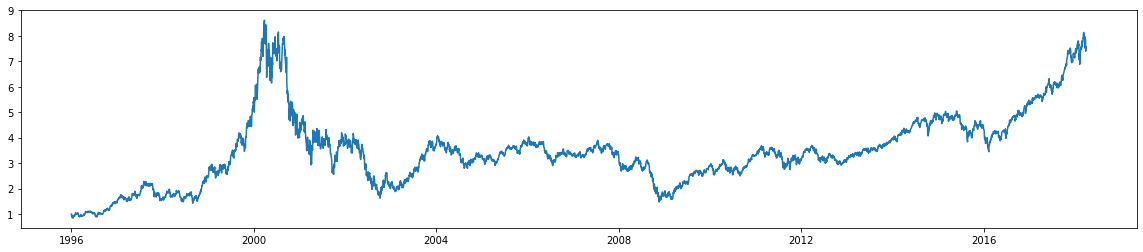

In [9]:
#mar_cap = pd.read_csv('C:\\Users\\User\\Desktop\\資料整理\\input_seperate\\semi_index.csv')
plt.figure(figsize=(20,4))
plt.plot(mar_cap['date'], mar_cap['semi index'])
plt.show()

In [10]:
mar_cap

,date,semi index
0,1996-01-02,1.000000
1,1996-01-03,0.968067
2,1996-01-04,0.967984
3,1996-01-05,0.964280
4,1996-01-08,0.958427
...,...,...
5595,2018-03-23,7.521252
5596,2018-03-26,7.856576
5597,2018-03-27,7.568355
5598,2018-03-28,7.398559


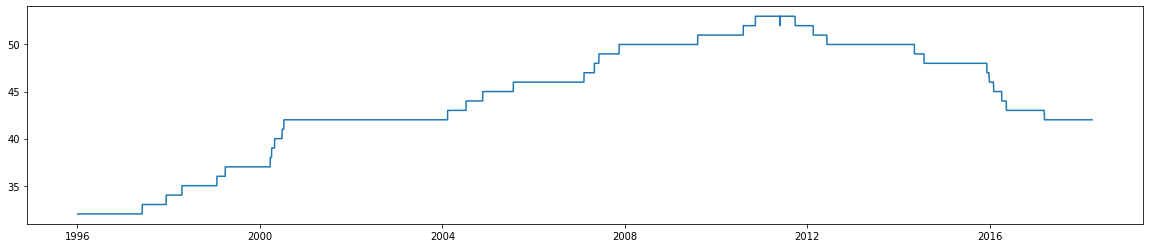

In [11]:
firm_num = []
for d in D:
    firm_num.append([d, len(df_date[df_date['date'] == d])])

firm_num = pd.DataFrame(firm_num)
firm_num.columns = ['date', 'firm number']
firm_num['date'] = pd.to_datetime([str(date)[:4]+'-'+str(date)[4:6]+'-'+str(date)[6:] for date in firm_num['date']])

plt.figure(figsize=(20,4))
plt.plot(firm_num['date'], firm_num['firm number'])
plt.show()

In [ ]:
set(df_date[df_date['date'] == 20110524]['CUSIP'])-set(df_date[df_date['date'] == 20110525]['CUSIP'])  # 04743P10, Qualcomm Atheros Inc
set(df_date[df_date['date'] == 20110526]['CUSIP'])-set(df_date[df_date['date'] == 20110525]['CUSIP'])  # G3727Q10, Freescale Semiconductor Ltd
